<a href="https://colab.research.google.com/github/gbouzioto/VeTo-workflows/blob/paper-recommender-diploma/paper_recommendation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Import statements and Utils

In [1]:
from pathlib import Path

import numpy as np
import pandas as pd

In [2]:
def plot_df(df_, *args, **kwargs):
  """Plots the dataframe based on the 3 Recommenders and the DCG scores"""
  index = ['MongoFTS', 'Veto', 'Hybrid']
  dcg1 = [df_.loc[df_['Recommender'] == 'MongoFTS', 'DCG1'].mean(), df_.loc[df_['Recommender'] == 'Veto', 'DCG1'].mean(), df_.loc[df['Recommender'] == 'Hybrid', 'DCG1'].mean()]
  dcg5 = [df_.loc[df_['Recommender'] == 'MongoFTS', 'DCG5'].mean(), df_.loc[df_['Recommender'] == 'Veto', 'DCG5'].mean(), df_.loc[df['Recommender'] == 'Hybrid', 'DCG5'].mean()]
  dcg10 = [df_.loc[df_['Recommender'] == 'MongoFTS', 'DCG10'].mean(), df_.loc[df_['Recommender'] == 'Veto', 'DCG10'].mean(), df_.loc[df['Recommender'] == 'Hybrid', 'DCG10'].mean()]
  dcg20 = [df_.loc[df_['Recommender'] == 'MongoFTS', 'DCG20'].mean(), df_.loc[df_['Recommender'] == 'Veto', 'DCG20'].mean(), df_.loc[df['Recommender'] == 'Hybrid', 'DCG20'].mean()]
  df_ = pd.DataFrame({'DCG1': dcg1, 'DCG5': dcg5, 'DCG10': dcg10, 'DCG20': dcg20}, index=index)
  df_.plot.bar(*args, **kwargs)

### Load Results

In [3]:
dataset_filepath = Path('/content/results.csv')
if not dataset_filepath.is_file():
    raise FileNotFoundError('Please provide a results.csv file to continue')
df = pd.read_csv(dataset_filepath, sep='\t', decimal=',')
# round to 2 decimals
df = df.round(2)
df.head()

,Recommender,DCG1,DCG5,DCG10,DCG20,Reviewer,Holdout
0,MongoFTS,5.84,16.93,26.38,36.33,1,no
1,Veto,2.92,4.18,4.18,7.41,1,no
2,Hybrid,5.84,17.06,26.56,34.11,1,no
3,MongoFTS,5.84,15.08,22.59,32.68,1,yes
4,Veto,2.92,4.18,4.18,7.41,1,yes


### Total Results

##### AVG **DCG1	DCG5 DCG10 DCG20** Scores

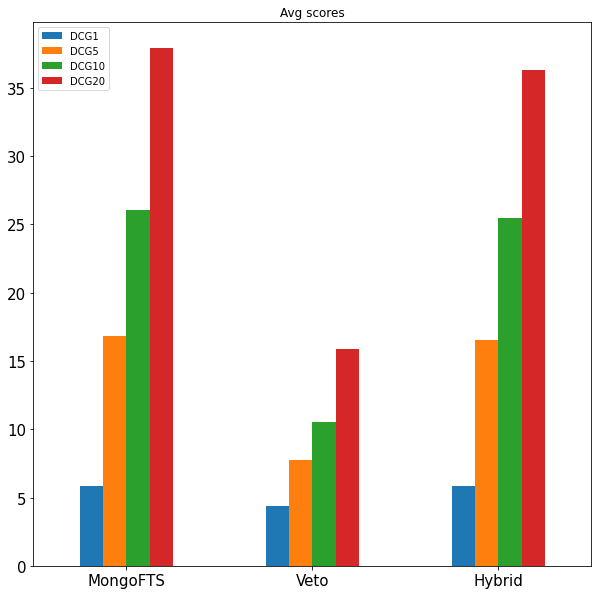

In [4]:
plot_df(df, rot=0, figsize=(10, 10), title='Avg scores', fontsize=15)

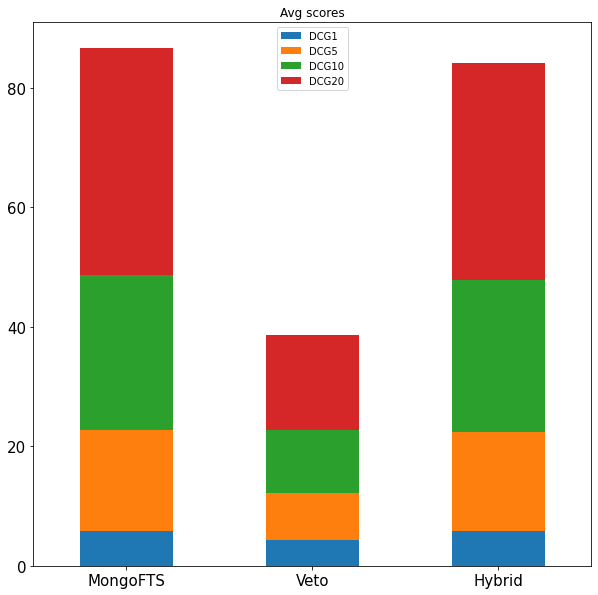

In [5]:
plot_df(df, rot=0, figsize=(10, 10), title='Avg scores', fontsize=15, stacked=True)

##### AVG **DCG1 DCG5	DCG10 DCG20** Scores with holdout

In [6]:
holdout_df = df[df['Holdout'] == 'yes'].drop(['Holdout'], axis=1)
holdout_df.head()

,Recommender,DCG1,DCG5,DCG10,DCG20,Reviewer
3,MongoFTS,5.84,15.08,22.59,32.68,1
4,Veto,2.92,4.18,4.18,7.41,1
5,Hybrid,5.84,12.43,17.56,24.37,1
9,MongoFTS,5.84,16.93,26.38,41.31,2
10,Veto,5.84,7.82,17.14,22.93,2


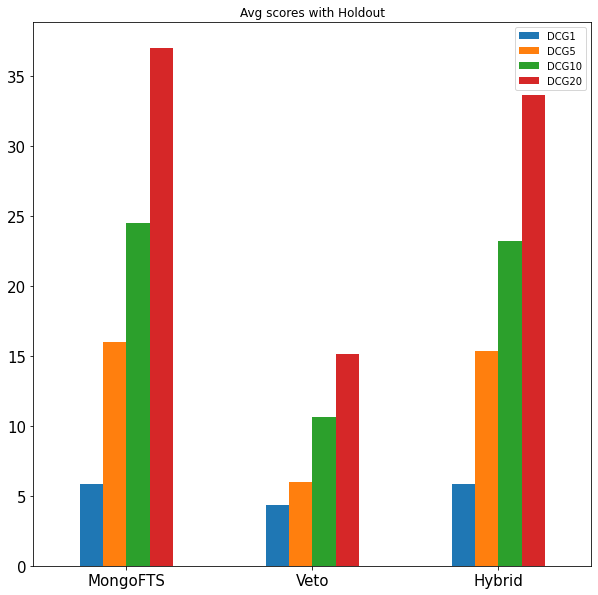

In [7]:
plot_df(holdout_df, rot=0, figsize=(10, 10), title='Avg scores with Holdout', fontsize=15)

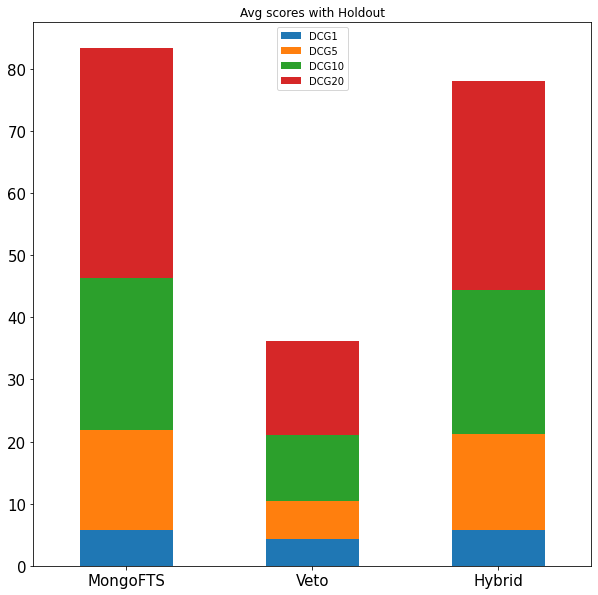

In [8]:
plot_df(holdout_df, rot=0, figsize=(10, 10), title='Avg scores with Holdout', fontsize=15, stacked=True)

##### AVG **DCG1 DCG5	DCG10 DCG20** Scores without holdout

In [9]:
no_holdout_df = df[df['Holdout'] == 'no'].drop(['Holdout'], axis=1)
no_holdout_df.head()

,Recommender,DCG1,DCG5,DCG10,DCG20,Reviewer
0,MongoFTS,5.84,16.93,26.38,36.33,1
1,Veto,2.92,4.18,4.18,7.41,1
2,Hybrid,5.84,17.06,26.56,34.11,1
6,MongoFTS,5.84,18.33,28.81,41.31,2
7,Veto,5.84,14.74,16.73,25.79,2


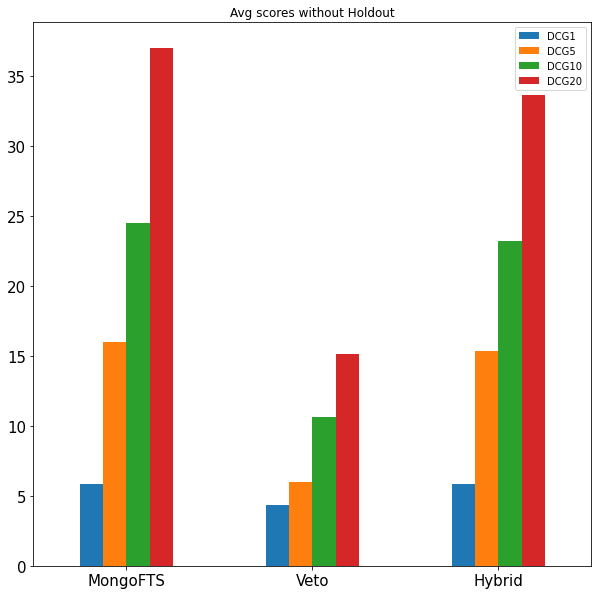

In [10]:
plot_df(holdout_df, rot=0, figsize=(10, 10), title='Avg scores without Holdout', fontsize=15)

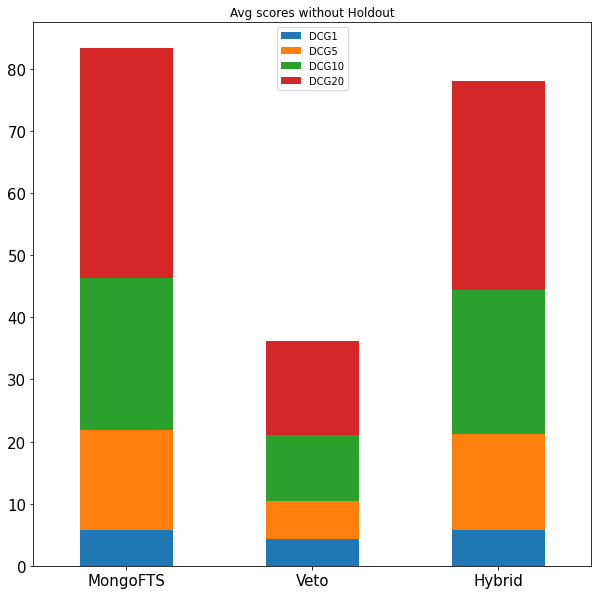

In [11]:
plot_df(holdout_df, rot=0, figsize=(10, 10), title='Avg scores without Holdout', fontsize=15, stacked=True)

#### Reviewer 1 Results

In [12]:
rev_1_df = df[df['Reviewer'] == 1].drop(['Reviewer'], axis=1)
rev_1_df.head()

,Recommender,DCG1,DCG5,DCG10,DCG20,Holdout
0,MongoFTS,5.84,16.93,26.38,36.33,no
1,Veto,2.92,4.18,4.18,7.41,no
2,Hybrid,5.84,17.06,26.56,34.11,no
3,MongoFTS,5.84,15.08,22.59,32.68,yes
4,Veto,2.92,4.18,4.18,7.41,yes


##### AVG **DCG1 DCG5	DCG10 DCG20** Scores

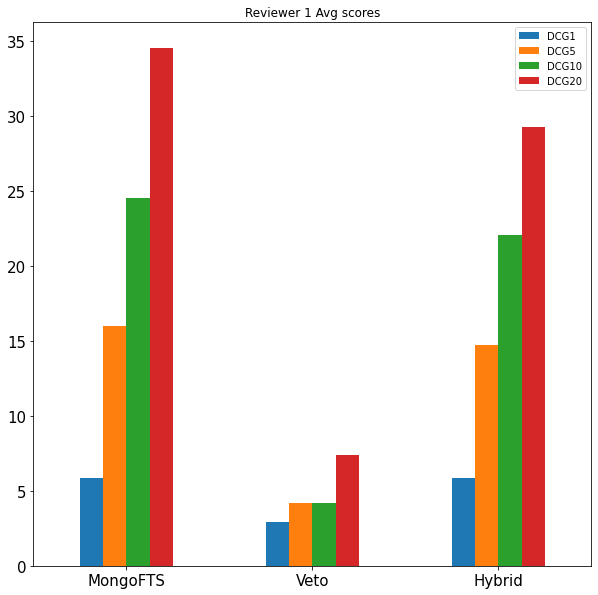

In [13]:
plot_df(rev_1_df, rot=0, figsize=(10, 10), title='Reviewer 1 Avg scores', fontsize=15)

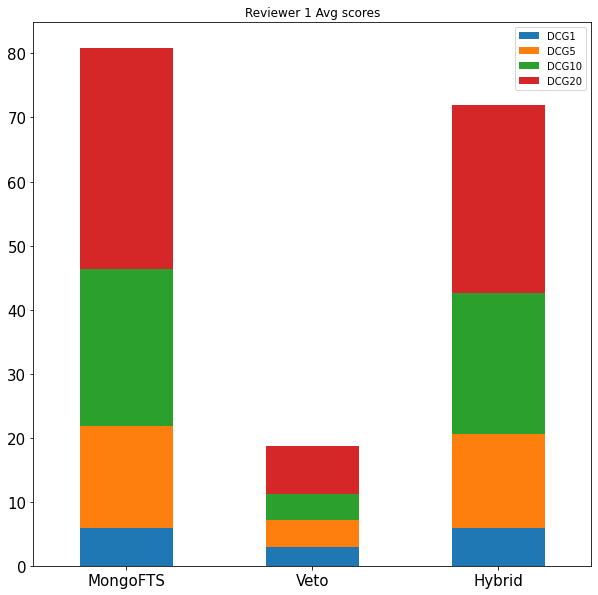

In [14]:
plot_df(rev_1_df, rot=0, figsize=(10, 10), title='Reviewer 1 Avg scores', fontsize=15, stacked=True)

##### AVG **DCG1 DCG5	DCG10 DCG20** Scores with holdout

In [15]:
rev_1__holdout_df = rev_1_df[rev_1_df['Holdout'] == 'yes'].drop(['Holdout'], axis=1)
rev_1__holdout_df.head()

,Recommender,DCG1,DCG5,DCG10,DCG20
3,MongoFTS,5.84,15.08,22.59,32.68
4,Veto,2.92,4.18,4.18,7.41
5,Hybrid,5.84,12.43,17.56,24.37


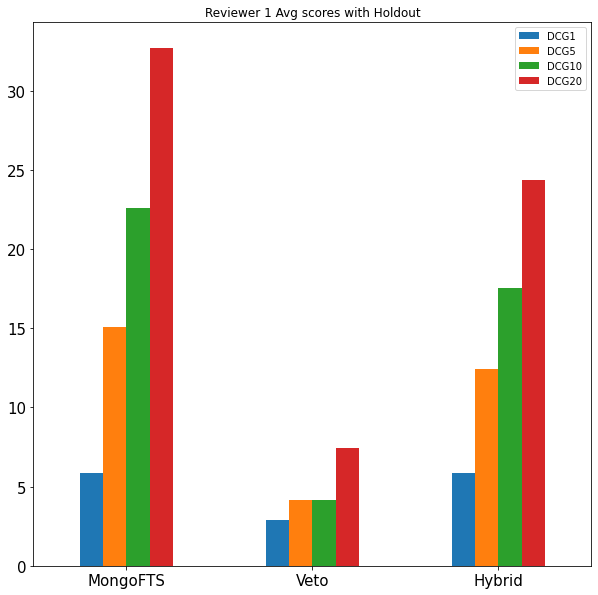

In [16]:
plot_df(rev_1__holdout_df, rot=0, figsize=(10, 10), title='Reviewer 1 Avg scores with Holdout', fontsize=15)

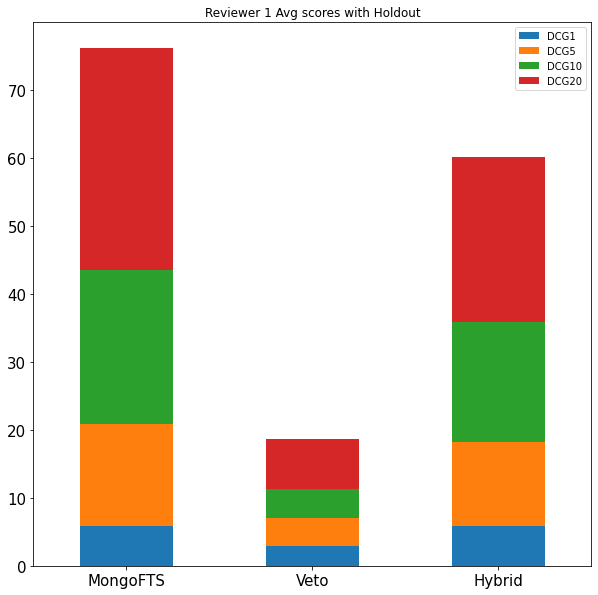

In [17]:
plot_df(rev_1__holdout_df, rot=0, figsize=(10, 10), title='Reviewer 1 Avg scores with Holdout', fontsize=15, stacked=True)

##### AVG **DCG1 DCG5	DCG10 DCG20** Scores without holdout

In [18]:
rev_1__no_holdout_df = rev_1_df[rev_1_df['Holdout'] == 'no'].drop(['Holdout'], axis=1)
rev_1__no_holdout_df.head()

,Recommender,DCG1,DCG5,DCG10,DCG20
0,MongoFTS,5.84,16.93,26.38,36.33
1,Veto,2.92,4.18,4.18,7.41
2,Hybrid,5.84,17.06,26.56,34.11


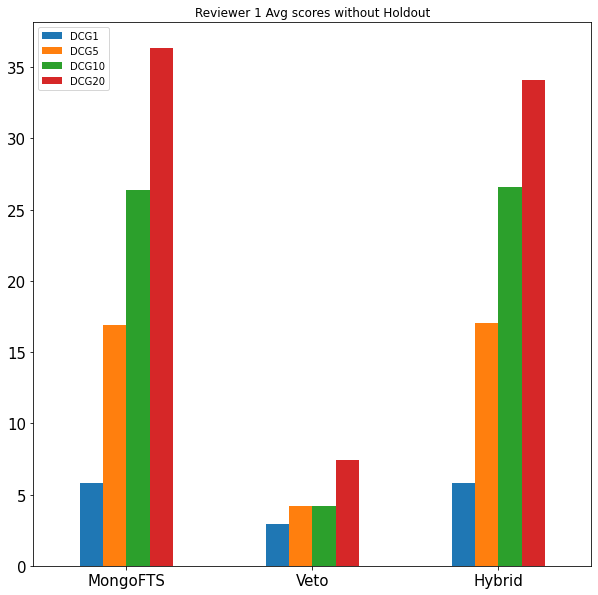

In [19]:
plot_df(rev_1__no_holdout_df, rot=0, figsize=(10, 10), title='Reviewer 1 Avg scores without Holdout', fontsize=15)

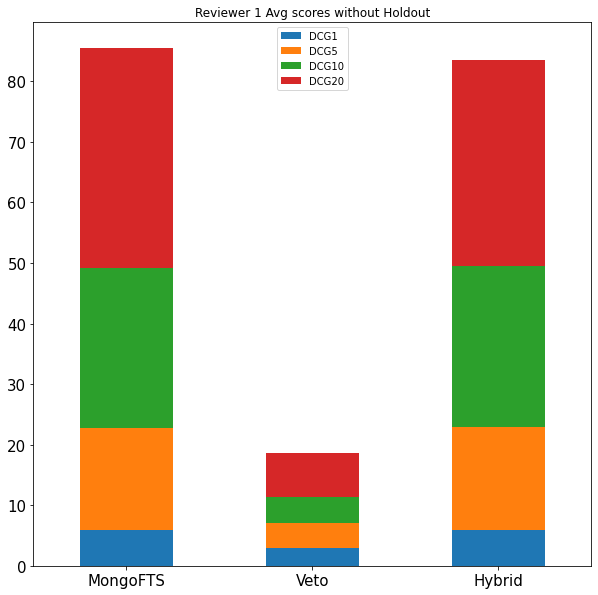

In [20]:
plot_df(rev_1__no_holdout_df, rot=0, figsize=(10, 10), title='Reviewer 1 Avg scores without Holdout', fontsize=15, stacked=True)

### Reviewer 2 Results

In [21]:
rev_2_df = df[df['Reviewer'] == 2].drop(['Reviewer'], axis=1)
rev_2_df.head()

,Recommender,DCG1,DCG5,DCG10,DCG20,Holdout
6,MongoFTS,5.84,18.33,28.81,41.31,no
7,Veto,5.84,14.74,16.73,25.79,no
8,Hybrid,5.84,18.33,28.81,43.76,no
9,MongoFTS,5.84,16.93,26.38,41.31,yes
10,Veto,5.84,7.82,17.14,22.93,yes


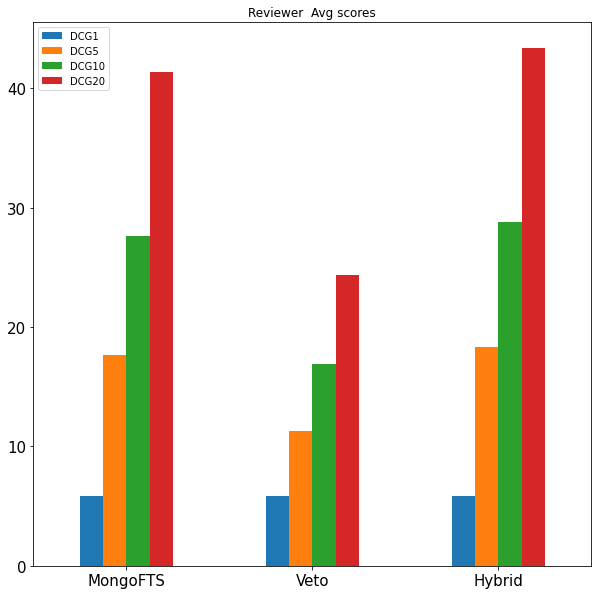

In [22]:
plot_df(rev_2_df, rot=0, figsize=(10, 10), title='Reviewer  Avg scores', fontsize=15)

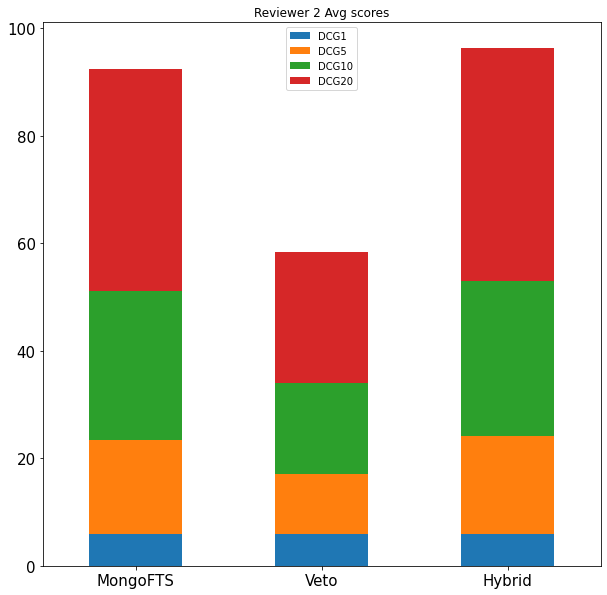

In [23]:
plot_df(rev_2_df, rot=0, figsize=(10, 10), title='Reviewer 2 Avg scores', fontsize=15, stacked=True)

##### AVG **DCG1 DCG5	DCG10 DCG20** Scores with holdout

In [24]:
rev_2__holdout_df = rev_2_df[rev_2_df['Holdout'] == 'yes'].drop(['Holdout'], axis=1)
rev_2__holdout_df.head()

,Recommender,DCG1,DCG5,DCG10,DCG20
9,MongoFTS,5.84,16.93,26.38,41.31
10,Veto,5.84,7.82,17.14,22.93
11,Hybrid,5.84,18.33,28.81,42.94


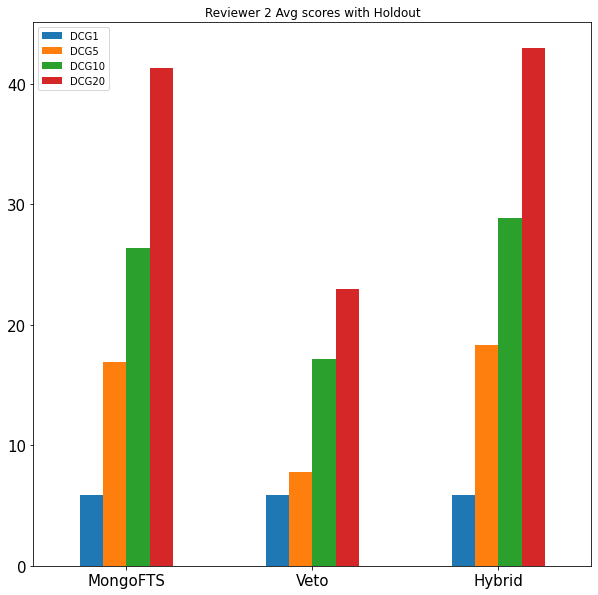

In [25]:
plot_df(rev_2__holdout_df, rot=0, figsize=(10, 10), title='Reviewer 2 Avg scores with Holdout', fontsize=15)

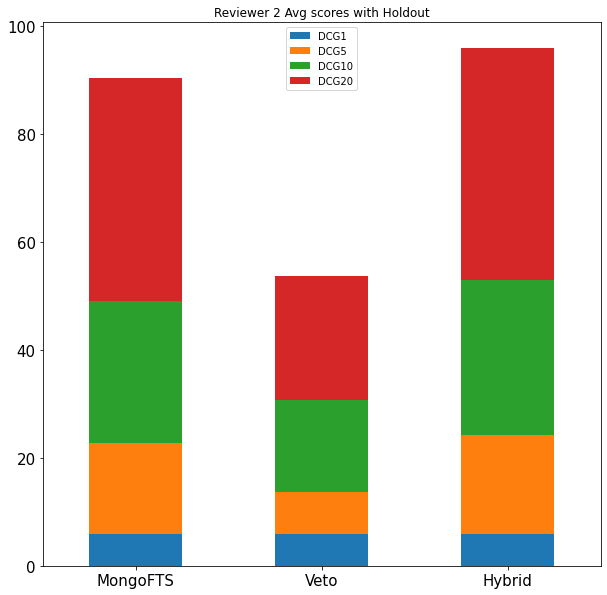

In [26]:
plot_df(rev_2__holdout_df, rot=0, figsize=(10, 10), title='Reviewer 2 Avg scores with Holdout', fontsize=15, stacked=True)

##### AVG **DCG1 DCG5	DCG10 DCG20** Scores without holdout

In [27]:
rev_2__no_holdout_df = rev_2_df[rev_2_df['Holdout'] == 'no'].drop(['Holdout'], axis=1)
rev_2__no_holdout_df.head()

,Recommender,DCG1,DCG5,DCG10,DCG20
6,MongoFTS,5.84,18.33,28.81,41.31
7,Veto,5.84,14.74,16.73,25.79
8,Hybrid,5.84,18.33,28.81,43.76


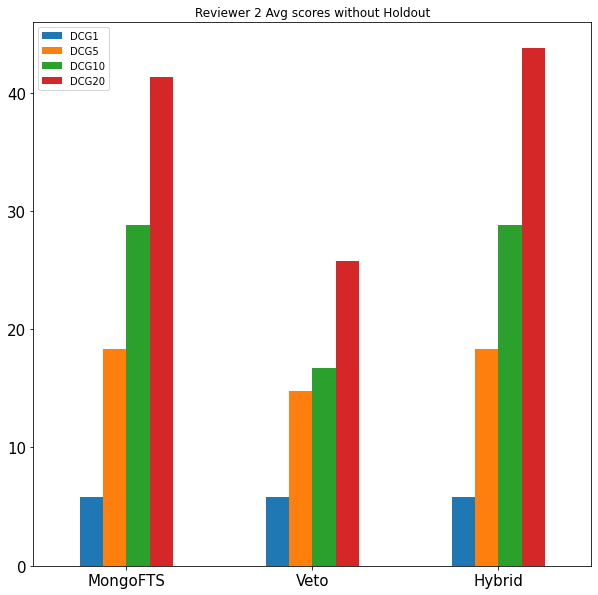

In [28]:
plot_df(rev_2__no_holdout_df, rot=0, figsize=(10, 10), title='Reviewer 2 Avg scores without Holdout', fontsize=15)

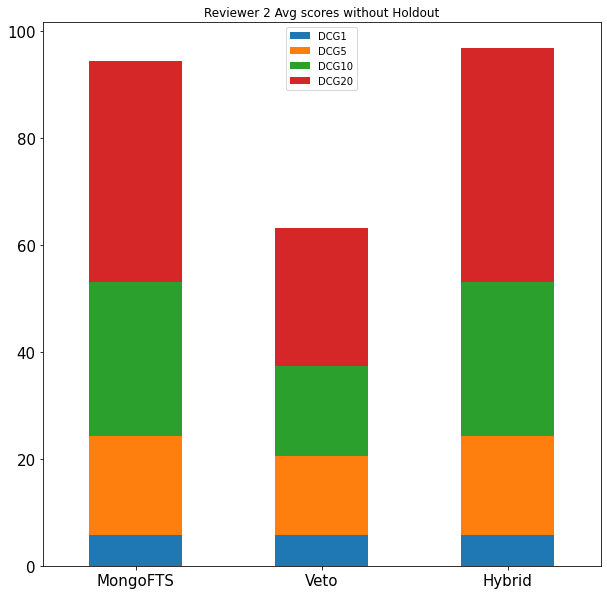

In [29]:
plot_df(rev_2__no_holdout_df, rot=0, figsize=(10, 10), title='Reviewer 2 Avg scores without Holdout', fontsize=15, stacked=True)

[link text](https://)